<a href="https://colab.research.google.com/github/Supansapkb/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [324]:
import pandas as pd
import json

In [325]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data House 

-บ้านมือ 1

In [326]:
link = 'https://docs.google.com/spreadsheets/d/1REdJzoGqhVn3fnM1I0GoSLzzeW2dAr2UNo1b64hNbJY/export?format=xlsx'
home1 = pd.read_excel(link,sheet_name='บ้านมือ1')
home1.head()

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,is_pro_in_house,created_at,updated_at,deleted_at
0,314.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
1,315.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
2,316.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
3,317.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
4,318.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN


In [327]:
home1.isnull().any()  #falseคือไม่มีค่าว่าง trueคือมีค่าว่าง

id                 False
parent_id          False
project_name       False
province           False
district            True
                   ...  
sold_out_at         True
is_pro_in_house     True
created_at          True
updated_at          True
deleted_at          True
Length: 141, dtype: bool

In [328]:
home1.columns

Index(['id', 'parent_id', 'project_name', 'province', 'district',
       'sub_district', 'zip_code', 'zone_id', 'zone', 'property_type',
       ...
       'cable_free', 'cable_none', 'cable_ask', 'position_previous',
       'position_current', 'sold_out_at', 'is_pro_in_house', 'created_at',
       'updated_at', 'deleted_at'],
      dtype='object', length=141)

In [329]:
home1 = home1[['number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]

In [330]:
home1.head()

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0
1,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0
2,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0
3,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0
4,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0


In [331]:
home1['second_hand'] = 'บ้านมือ1'
home1.head()

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0,บ้านมือ1
1,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0,บ้านมือ1
2,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0,บ้านมือ1
3,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0,บ้านมือ1
4,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0,บ้านมือ1


In [332]:
home1.isnull().any()  #falseคือไม่มีค่าว่าง trueคือมีค่าว่าง

number_of_rai          True
number_of_ngan         True
number_of_va           True
number_of_story        True
number_of_bedroom      True
number_of_bathroom     True
direction              True
furniture              True
usable_area            True
number_of_parking      True
sell_price             True
second_hand           False
dtype: bool

In [333]:
print(home1.isnull().sum()) 

number_of_rai         754
number_of_ngan        754
number_of_va           92
number_of_story         4
number_of_bedroom      10
number_of_bathroom     10
direction              88
furniture              88
usable_area            36
number_of_parking      21
sell_price             21
second_hand             0
dtype: int64


In [334]:
#fill NA with Text เลืกfillnaเนื่องจากค่าว่างของข้อมูลมีค่อนข้างเยอะ
home1[['number_of_rai','number_of_ngan','number_of_va']] = home1[['number_of_rai','number_of_ngan','number_of_va']].fillna('Unknown') #บ้านที่ไม่ได้เติมช่องรีโนเวท fillnaว่าunknown 

In [335]:
# จำนวนลิฟต์และชั้น
home1[['number_of_story','number_of_parking','usable_area','direction','furniture']]  = home1[['number_of_story','number_of_parking','usable_area','direction','furniture']].fillna(0) 
# สิ่งอำนวยความสะดวก
home1[['number_of_bedroom','number_of_bathroom']] = home1[['number_of_bedroom','number_of_bathroom']].fillna(1) #จำนวนห้องนอนบ้านต้องมีอย่างน้อย 1 ห้อง

In [336]:
home1 = home1.dropna(subset=['sell_price'])

In [337]:
home1.isnull().any()

number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price            False
second_hand           False
dtype: bool

-บ้านมือ 2 

In [338]:
link = 'https://docs.google.com/spreadsheets/d/1REdJzoGqhVn3fnM1I0GoSLzzeW2dAr2UNo1b64hNbJY/export?format=xlsx'
home2 = pd.read_excel(link,sheet_name='บ้านมือ2')
home2.head()

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
0,1.0,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านวังเวิน,NaN,ขอนแก่น,ชนบท,ศรีบุญเรือง,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านหนองบัวบาน,NaN,ขอนแก่น,น้ำพอง,ทรายมูล,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.0,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,NaN,NaN,ขอนแก่น,มัญจาคีรี,กุดเค้า,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,ชลลดา ขอนแก่น,บริษัท แลนด์แอนด์เฮ้าส์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,เบสท์โฮม,เบสท์โฮม เลี่ยงเมืองขอนแก่น,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
home2.columns

Index(['id', 'name_th', 'name_en', 'project_name', 'company', 'province',
       'district', 'sub_district', 'property_type', 'home improvement',
       'renovate', 'public utility', 'land type', 'land wide(m)',
       'land long(m)', 'topsoil', 'corner', 'zip_code', 'zone', 'alley',
       'street', 'latitude', 'longitude', 'number_of_rai', 'number_of_ngan',
       'number_of_va', 'construct_year', 'model', 'sell_price',
       'number_of_unit', 'number_of_story', 'number_of_bedroom',
       'number_of_bathroom', 'number_of_parking', 'usable_area',
       'central_cost', 'direction', 'furniture', 'building_number',
       'number_of_building', 'floor_number', 'parking_percentage', 'has_pool',
       'has_keycard', 'has_security', 'has_fitness', 'has_garden'],
      dtype='object')

In [340]:
home2 = home2[['id','latitude', 'longitude','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]

In [341]:
home2.head()

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,1.0,16.139321,102.631587,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.0,2.0,390000.0
1,4.0,16.676156,102.917998,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.0,3.0,820000.0
2,16.0,16.129358,102.530670,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.0,9.0,3260000.0
3,18.0,16.459052,102.806404,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.0,2.0,5000000.0
4,19.0,16.450000,102.800680,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.0,2.0,3500000.0


In [342]:
home2['second_hand'] = 'บ้านมือ2'
home2.head()

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,1.0,16.139321,102.631587,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.0,2.0,390000.0,บ้านมือ2
1,4.0,16.676156,102.917998,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.0,3.0,820000.0,บ้านมือ2
2,16.0,16.129358,102.530670,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.0,9.0,3260000.0,บ้านมือ2
3,18.0,16.459052,102.806404,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.0,2.0,5000000.0,บ้านมือ2
4,19.0,16.450000,102.800680,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.0,2.0,3500000.0,บ้านมือ2


In [343]:
home2.isnull().any()  #falseคือไม่มีค่าว่าง trueคือมีค่าว่าง

id                    False
latitude               True
longitude              True
renovate               True
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story        True
number_of_bedroom      True
number_of_bathroom    False
direction             False
furniture             False
usable_area            True
number_of_parking      True
sell_price             True
second_hand           False
dtype: bool

In [344]:
print(home2.isnull().sum()) 

id                      0
latitude               22
longitude              22
renovate              211
number_of_rai           0
number_of_ngan          0
number_of_va            0
number_of_story       549
number_of_bedroom      27
number_of_bathroom      0
direction               0
furniture               0
usable_area           920
number_of_parking     215
sell_price              1
second_hand             0
dtype: int64


In [399]:
#fill NA with Text เลือกfillnaเนื่องจากค่าว่างของข้อมูลมีค่อนข้างเยอะ
home2['renovate'] = home2['renovate'].fillna('Unknown') #บ้านที่ไม่ได้เติมช่องรีโนเวท fillnaว่าunknown 

In [400]:
# จำนวนลิฟต์และชั้น
home2[['number_of_story','number_of_parking','usable_area']]  = home2[['number_of_story','number_of_parking','usable_area']].fillna(0) 
# สิ่งอำนวยความสะดวก
home2[['number_of_bedroom']] = home2[['number_of_bedroom']].fillna(1) #จำนวนห้องนอนบ้านต้องมีอย่างน้อย 1 ห้อง

In [401]:
home2['sell_price'] = home2['sell_price'].dropna()

In [402]:
home2 = home2.dropna(subset=['sell_price'])

In [403]:
home2['latitude'] = home2['latitude'].fillna('Unknown')            
     

In [404]:
home2.isnull().any()

id                    False
latitude              False
longitude              True
renovate              False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price            False
second_hand           False
dtype: bool

In [405]:
print(home2.isnull().sum()) 

id                     0
latitude               0
longitude             22
renovate               0
number_of_rai          0
number_of_ngan         0
number_of_va           0
number_of_story        0
number_of_bedroom      0
number_of_bathroom     0
direction              0
furniture              0
usable_area            0
number_of_parking      0
sell_price             0
second_hand            0
dtype: int64


- รวมตาราง บ้านมือ 1 กับ บ้านมือ 2 

In [352]:
home = pd.concat([home2, home1])
home


,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,1.0,16.139321,102.631587,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.0,2.0,390000.0,บ้านมือ2
1,4.0,16.676156,102.917998,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.0,3.0,820000.0,บ้านมือ2
2,16.0,16.129358,102.530670,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.0,9.0,3260000.0,บ้านมือ2
3,18.0,16.459052,102.806404,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.0,2.0,5000000.0,บ้านมือ2
4,19.0,16.45,102.800680,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.0,2.0,3500000.0,บ้านมือ2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,1.0,3.0,2.0,0.0,0.0,125.0,2.0,2290000.0,บ้านมือ1
750,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,1.0,3.0,2.0,0.0,0.0,70.0,2.0,2590000.0,บ้านมือ1
751,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,1.0,3.0,2.0,0.0,0.0,120.0,2.0,1990000.0,บ้านมือ1
752,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,1.0,3.0,2.0,0.0,0.0,100.0,2.0,1990000.0,บ้านมือ1


#  "คำตอบนักประเมิน(ID)"

In [353]:
home_ID = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='บ้าน')
home_ID.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


# 7-eleven

In [354]:
with open('/content/drive/MyDrive/bsc_dpdm22/midterm/7-eleven.json') as json_file:
  this_json = json.loads(json_file.read())

In [355]:
seven_id = {}
for t in this_json:
    l = list()
    for x in this_json[t]:
        l.append(x['geometry']['location'])
    #print(t)
    #print(l)
    seven_id[t]=l
seven_id

{'1': [],
 '4': [],
 '6': [{'lat': 16.0603149, 'lng': 102.7264856},
  {'lat': 16.0564741, 'lng': 102.7268436},
  {'lat': 16.0595413, 'lng': 102.7294307},
  {'lat': 16.0751998, 'lng': 102.7356017},
  {'lat': 16.070648, 'lng': 102.7344055},
  {'lat': 16.0582995, 'lng': 102.7360953},
  {'lat': 16.0573901, 'lng': 102.7192322}],
 '7': [],
 '9': [],
 '11': [{'lat': 15.809535, 'lng': 102.6069684},
  {'lat': 15.8193062, 'lng': 102.6012589},
  {'lat': 15.8125848, 'lng': 102.6009202},
  {'lat': 15.8102763, 'lng': 102.5985417},
  {'lat': 15.8095537, 'lng': 102.5879272},
  {'lat': 15.7970035, 'lng': 102.6075296}],
 '16': [{'lat': 16.1340329, 'lng': 102.5331697},
  {'lat': 16.1294298, 'lng': 102.540669}],
 '17': [{'lat': 16.4052438, 'lng': 102.7823961},
  {'lat': 16.3898169, 'lng': 102.8053144},
  {'lat': 16.4221806, 'lng': 102.8047853},
  {'lat': 16.4083692, 'lng': 102.7948258},
  {'lat': 16.4053255, 'lng': 102.7746538}],
 '18': [{'lat': 16.4506978, 'lng': 102.7955315},
  {'lat': 16.445794, 'lng':

In [356]:
this_seven = seven_id
this_seven

{'1': [],
 '4': [],
 '6': [{'lat': 16.0603149, 'lng': 102.7264856},
  {'lat': 16.0564741, 'lng': 102.7268436},
  {'lat': 16.0595413, 'lng': 102.7294307},
  {'lat': 16.0751998, 'lng': 102.7356017},
  {'lat': 16.070648, 'lng': 102.7344055},
  {'lat': 16.0582995, 'lng': 102.7360953},
  {'lat': 16.0573901, 'lng': 102.7192322}],
 '7': [],
 '9': [],
 '11': [{'lat': 15.809535, 'lng': 102.6069684},
  {'lat': 15.8193062, 'lng': 102.6012589},
  {'lat': 15.8125848, 'lng': 102.6009202},
  {'lat': 15.8102763, 'lng': 102.5985417},
  {'lat': 15.8095537, 'lng': 102.5879272},
  {'lat': 15.7970035, 'lng': 102.6075296}],
 '16': [{'lat': 16.1340329, 'lng': 102.5331697},
  {'lat': 16.1294298, 'lng': 102.540669}],
 '17': [{'lat': 16.4052438, 'lng': 102.7823961},
  {'lat': 16.3898169, 'lng': 102.8053144},
  {'lat': 16.4221806, 'lng': 102.8047853},
  {'lat': 16.4083692, 'lng': 102.7948258},
  {'lat': 16.4053255, 'lng': 102.7746538}],
 '18': [{'lat': 16.4506978, 'lng': 102.7955315},
  {'lat': 16.445794, 'lng':

In [357]:
id = 19

In [358]:
this_home = home[home['id']== id]
this_home

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
4,19.0,16.45,102.80068,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.0,2.0,3500000.0,บ้านมือ2


In [359]:
this_home['latitude']

4    16.45
Name: latitude, dtype: object

In [360]:
this_home['longitude'].values

array([102.80068])

In [361]:
this_home['longitude'].values[0]

102.80068

In [362]:
h_lat=this_home['latitude'].values[0]
h_long=this_home['longitude'].values[0]

In [363]:
import geopy.distance
geopy.distance.geodesic(loc1,loc2).m

711.0563389115968

In [364]:
this_seven = seven_id[str(id)]

In [365]:
this_seven

[{'lat': 16.4506978, 'lng': 102.7955315},
 {'lat': 16.4342316, 'lng': 102.8145643},
 {'lat': 16.4362708, 'lng': 102.7997081},
 {'lat': 16.4379979, 'lng': 102.7868055},
 {'lat': 16.4423, 'lng': 102.808299},
 {'lat': 16.4421359, 'lng': 102.8198991},
 {'lat': 16.4410003, 'lng': 102.8216208},
 {'lat': 16.4463944, 'lng': 102.8200097}]

- คำนวณระยะห่างระหว่าง บ้าน กับ 7-11


In [366]:
seven_dist=list()
loc1 = [h_lat,h_long]
for seven in this_seven:
    loc2 = [seven['lat'],seven['lng']]
    dist = geopy.distance.geodesic(loc1,loc2).m
    seven_dist.append(dist)

seven_dist

[555.2115844834943,
 2289.8950007438752,
 1522.8598983295649,
 1989.875031380524,
 1178.1898727966336,
 2229.3573486127448,
 2448.093059985315,
 2102.476558179809]

In [367]:
def cal_seven_radius(seven_dist_list,radius):
    num = 0
    for seven in seven_dist_list:
        if seven < radius:
            num = num + 1
    return num
     

In [368]:
import numpy as np

In [369]:
record_list = list()

In [370]:
record_dict = {}
record_dict['id'] = id 
record_dict['d250-7/11'] = sum(np.array(seven_dist) < 250)
record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
record_dict['d750-7/11'] = sum(np.array(seven_dist) < 750)
record_dict['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
record_dict['d1250-7/11'] = sum(np.array(seven_dist) < 1250)
record_dict['d1500-7/11'] = sum(np.array(seven_dist) < 1500)
record_dict

{'id': 19,
 'd250-7/11': 0,
 'd500-7/11': 0,
 'd750-7/11': 1,
 'd1000-7/11': 1,
 'd1250-7/11': 2,
 'd1500-7/11': 2}

In [371]:
record_list.append(record_dict)

In [372]:
pd.DataFrame(record_list)

,id,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,19,0,0,1,1,2,2


In [373]:
home['id']

0       1.0
1       4.0
2      16.0
3      18.0
4      19.0
       ... 
749     NaN
750     NaN
751     NaN
752     NaN
753     NaN
Name: id, Length: 2388, dtype: object

In [374]:
record_list = list()
for id in home2['id']:
    print(id)
    this_home = home2[home2['id']== id]
    h_lat=this_home['latitude'].values[0]
    h_long=this_home['longitude'].values[0]
    this_seven = seven_id[str(int(id))]
    seven_dist=list()
    loc1 = [h_lat,h_long]
    for seven in this_seven:
        loc2 = [seven['lat'],seven['lng']]
        dist = geopy.distance.geodesic(loc1,loc2).m
        seven_dist.append(dist)
    
    record_dict = {}
    record_dict['id'] = id 
    record_dict['d250-7/11'] = sum(np.array(seven_dist) < 250)
    record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
    record_dict['d750-7/11'] = sum(np.array(seven_dist) < 750)
    record_dict['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
    record_dict['d1250-7/11'] = sum(np.array(seven_dist) < 1250)
    record_dict['d1500-7/11'] = sum(np.array(seven_dist) < 1500)
    record_list.append(record_dict)     

1.0
4.0
16.0
18.0
19.0
20.0
23.0
25.0
28.0
29.0
31.0
33.0
38.0
40.0
491.0
493.0
494.0
495.0
508.0
509.0
510.0
512.0
513.0
519.0
524.0
525.0
526.0
527.0
528.0
529.0
531.0
532.0
533.0
534.0
535.0
537.0
538.0
546.0
547.0
550.0
562.0
563.0
564.0
565.0
566.0
567.0
568.0
570.0
585.0
586.0
587.0
588.0
589.0
590.0
591.0
592.0
593.0
595.0
596.0
597.0
598.0
621.0
622.0
623.0
624.0
625.0
626.0
627.0
628.0
629.0
631.0
632.0
633.0
634.0
635.0
637.0
638.0
639.0
640.0
641.0
653.0
654.0
655.0
656.0
657.0
658.0
659.0
667.0
668.0
669.0
670.0
671.0
672.0
673.0
674.0
675.0
676.0
677.0
678.0
679.0
680.0
683.0
684.0
685.0
690.0
691.0
692.0
693.0
694.0
695.0
696.0
697.0
698.0
699.0
703.0
704.0
710.0
715.0
716.0
718.0
721.0
758.0
759.0
760.0
1024.0
1056.0
1066.0
1067.0
1068.0
1070.0
1071.0
1074.0
1091.0
1092.0
1094.0
1106.0
1107.0
1108.0
1110.0
1111.0
1119.0
1120.0
1121.0
1122.0
1123.0
1124.0
1125.0
1126.0
1127.0
1128.0
1129.0
1130.0
1131.0
1132.0
1133.0
1134.0
1135.0
1136.0
1137.0
1138.0
1139.0
1142.0
1143.0

KeyError: ignored

In [375]:
final_table = pd.DataFrame(record_list)

In [376]:
final_table

,id,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,1.0,0,0,0,0,0,0
1,4.0,0,0,0,0,0,0
2,16.0,0,0,1,1,2,2
3,18.0,0,0,0,0,0,2
4,19.0,0,0,1,1,2,2
...,...,...,...,...,...,...,...
361,3286.0,0,2,2,4,5,9
362,3287.0,0,0,0,0,0,0
363,3288.0,0,0,0,0,0,0
364,3289.0,0,0,0,0,1,1


#school

In [377]:
with open('/content/drive/MyDrive/bsc_dpdm22/midterm/school.json') as json_file:
  school_json = json.loads(json_file.read())

In [ ]:
school_id = {}
for t in school_json:
    l = list()
    for x in school_json[t]:
        l.append(x['geometry']['location'])
    #print(t)
    #print(l)
    school_id[t]=l
school_id

In [ ]:
this_school = school_id
this_school

In [380]:
id = 1

In [381]:
this_home = home[home['id']== id]
this_home

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,1.0,16.139321,102.631587,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.0,2.0,390000.0,บ้านมือ2


In [382]:
this_home['latitude']

0    16.139321
Name: latitude, dtype: object

In [383]:
this_home['longitude'].values

array([102.631587])

In [384]:
this_home['longitude'].values[0]

102.631587

In [385]:
h_lat=this_home['latitude'].values[0]
h_long=this_home['longitude'].values[0]

In [386]:
import geopy.distance
geopy.distance.geodesic(loc1,loc2).m

711.0563389115968

In [387]:
this_school = school_id[str(id)]

In [388]:
this_school 

[{'lat': 16.1311875, 'lng': 102.6504375},
 {'lat': 16.1350641, 'lng': 102.6290474},
 {'lat': 16.1482073, 'lng': 102.6207588},
 {'lat': 16.1279195, 'lng': 102.6138295}]

-คำนวณระยะห่างระหว่าง บ้าน กับ school

In [389]:
school_dist=list()
loc1 = [h_lat,h_long]
for school in this_school:
    loc2 = [school['lat'],school['lng']]
    dist = geopy.distance.geodesic(loc1,loc2).m
    school_dist.append(dist)

school_dist

[2208.0573636013673, 543.7769321967597, 1519.3170869601063, 2280.2552902849066]

In [390]:
def cal_school_radius(school_dist_list,radius):
    num = 0
    for school in school_dist_list:
        if school < radius:
            num = num + 1
    return num

In [391]:
import numpy as np

In [392]:
record_list = list()

In [393]:
record_dict = {}
record_dict['id'] = id 
record_dict['d250-school'] = sum(np.array(school_dist) < 250)
record_dict['d500-school'] = sum(np.array(school_dist) < 500)
record_dict['d750-school'] = sum(np.array(school_dist) < 750)
record_dict['d1000-school'] = sum(np.array(school_dist) < 1000)
record_dict['d1250-school'] = sum(np.array(school_dist) < 1250)
record_dict['d1500-school'] = sum(np.array(school_dist) < 1500)
record_dict

{'id': 1,
 'd250-school': 0,
 'd500-school': 0,
 'd750-school': 1,
 'd1000-school': 1,
 'd1250-school': 1,
 'd1500-school': 1}

In [394]:
record_list.append(record_dict)

In [395]:
pd.DataFrame(record_list)

,id,d250-school,d500-school,d750-school,d1000-school,d1250-school,d1500-school
0,1,0,0,1,1,1,1


In [396]:
home['id']

0       1.0
1       4.0
2      16.0
3      18.0
4      19.0
       ... 
749     NaN
750     NaN
751     NaN
752     NaN
753     NaN
Name: id, Length: 2388, dtype: object

In [397]:
record_list = list()
for id in home2['id']:
    print(id)
    this_home = home2[home2['id']== id]
    h_lat=this_home['latitude'].values[0]
    h_long=this_home['longitude'].values[0]
    this_school = school_id[str(int(id))]
    school_dist=list()
    loc1 = [h_lat,h_long]
    for seven in this_school:
        loc2 = [school['lat'],school['lng']]
        dist = geopy.distance.geodesic(loc1,loc2).m
        school_dist.append(dist)
    
record_dict = {}
record_dict['id'] = id 
record_dict['d250-school'] = sum(np.array(school_dist) < 250)
record_dict['d500-school'] = sum(np.array(school_dist) < 500)
record_dict['d750-school'] = sum(np.array(school_dist) < 750)
record_dict['d1000-school'] = sum(np.array(school_dist) < 1000)
record_dict['d1250-school'] = sum(np.array(school_dist) < 1250)
record_dict['d1500-school'] = sum(np.array(school_dist) < 1500)
record_list.append(record_dict)

1.0
4.0
16.0
18.0
19.0
20.0


KeyError: ignored

In [398]:
final_table = pd.DataFrame(record_list) # ??????
final_table

""


# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

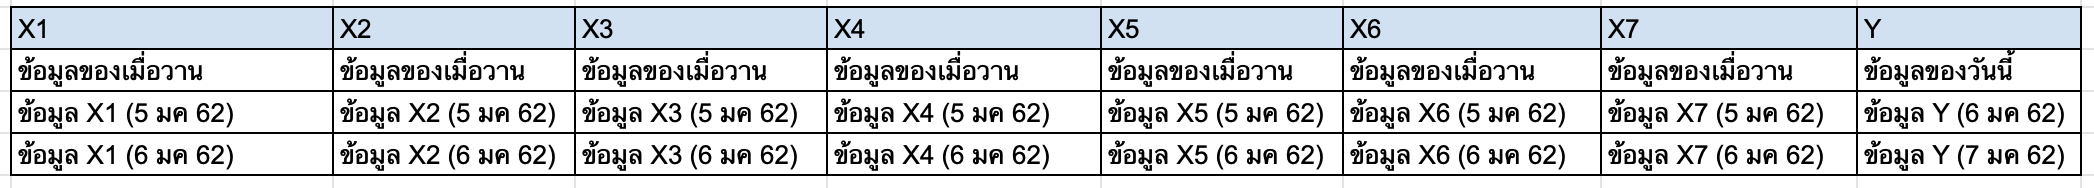

